In [1]:
from moralis import evm_api
import numpy as np
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import datetime
import time

In [2]:
# api key provided by moralis.io
api_key = "xn1YIuBxnS4lGnV2ygqifM1vyFyD052Xf3SvCIGXzvvSAqaeXPcHEQ9lN1eae9F3"

In [3]:
#convert json array into python dataframe
cursor = ''
df = pd.DataFrame()

In [4]:
for x in range(2):
#call api to get all nft data for cryptopunks
    result = evm_api.nft.get_nft_contract_transfers(
        api_key=api_key,
        params={
            "address": "0xb47e3cd837dDF8e4c57F05d70Ab865de6e193BBB",
            "chain": "eth",
            "cursor": cursor
        }
    )

    cursor = result["cursor"]
    df2 = json_normalize(result['result'])

    if df.empty:
        df = df2
    else:
        df = pd.concat([df, df2])

    time.sleep(1.1)

print(df)

   block_number           block_timestamp  \
0      17843575  2023-08-04T19:02:47.000Z   
1      17843550  2023-08-04T18:57:47.000Z   
2      17842358  2023-08-04T14:57:23.000Z   
3      17841392  2023-08-04T11:42:23.000Z   
4      17841385  2023-08-04T11:40:59.000Z   
..          ...                       ...   
95     17717224  2023-07-18T02:44:11.000Z   
96     17717223  2023-07-18T02:43:59.000Z   
97     17717221  2023-07-18T02:43:35.000Z   
98     17717219  2023-07-18T02:43:11.000Z   
99     17717217  2023-07-18T02:42:47.000Z   

                                           block_hash  \
0   0xf893fa37dd4ac3c80713ae42a6a87eca092c8c6aeb18...   
1   0x93895eeee7f7d51c95efc1fc1a681a6de82bcaeeaa82...   
2   0x5780383f4b1440dcc260c45c9141b3a0fc138eba6e1a...   
3   0x35e2091ef84f14abb85010d6af7140a366317d77d9a2...   
4   0x7bbc6fab9f99e7e8cb691583e4cdee96de2d87cae45b...   
..                                                ...   
95  0xce01f669e48f061752710f0412150e14957eb393b944...   
96 

In [13]:
# I want to see purchase not to transfer from one wallet to another
df = df[df['value'] != '0']
df

,block_number,block_timestamp,block_hash,transaction_hash,transaction_index,log_index,value,contract_type,transaction_type,token_address,...,from_address,from_address_label,to_address,to_address_label,amount,verified,operator,possible_spam,verified_collection,Date
1,17843550,2023-08-04T18:57:47.000Z,0x93895eeee7f7d51c95efc1fc1a681a6de82bcaeeaa82...,0xd7338b326966d6cf049dcd6f6352a771104419f56e94...,96,147,47500000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,...,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,None,0xf51ca518244ca9218bdc2ee6b1312c2f1f464b11,None,1,1,None,False,True,Aug 04
5,17841292,2023-08-04T11:22:23.000Z,0xbc0ece3db436b2af64bd3005af81d637d017fbcc2dc9...,0xd81a786cf99b0ab79de3dd0202d2d6c05969c1a36a1c...,91,207,500000000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,...,0x7224a1a8750d77c182d7ade10b8edcbd3aae0e2d,None,0x78f0269f5b1ca914c8c58993f41181f89e212b27,None,1,1,None,False,True,Aug 04
10,17835748,2023-08-03T16:45:59.000Z,0x9116f96978513c600e89d4eaf7845a2f0f714eabee66...,0x0f911812307c0c208de073aa0ef414fe296149c218da...,135,383,49000000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,...,0x32a348ead7ed30d35b96b9f87320fef862033574,None,0x9df6a358688ccdc2a955568a05aacac7a998a319,None,1,1,None,False,True,Aug 03
16,17831574,2023-08-03T02:45:23.000Z,0xb021f790b0a9bb2231770ad19ebd5105ae9e648a17fc...,0xff1cbb9e00b8c71c40aa2ffc5c2d8da1dc2043eb00f1...,42,191,92000000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,...,0x56fc2066e288a4f67e6b9950618b3cb80bae3cfd,None,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,None,1,1,None,False,True,Aug 03
18,17830459,2023-08-02T23:00:35.000Z,0xa2b5baad30d0f37284c7c62200614306ddb887c42e02...,0xbbaab00bbf97a6923b3dc90eb61f3ea64269cedd677b...,119,253,57000000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,...,0x08b571c651b185cffae8d4c75d504232e9167edc,None,0x6dacb7352b4ec1e2b979a05e3cf1f126ad641110,None,1,1,None,False,True,Aug 02
19,17830421,2023-08-02T22:52:59.000Z,0x96bf95677b8af3448371175985662baa55cd591159c5...,0xe7434a402db2af3ac80f8ccbb4d1b97c10c4dca130ab...,81,242,55000000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,...,0xbc7279ff434c9d0b96db5d37d312e14662d846ac,None,0x08b571c651b185cffae8d4c75d504232e9167edc,None,1,1,None,False,True,Aug 02
21,17829985,2023-08-02T21:25:23.000Z,0x5d455e0042562be5417db6dd088487d79643daa4cc76...,0x8ce6f9d85b243dfad4b07d3a08c312ca0fda8ea9b84c...,80,184,235000000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,...,0x10becc056a821eb8a128142aa806ddef2e19378f,None,0x2a193336b79d9462bb36215210d44e9d60878c65,None,1,1,None,False,True,Aug 02
22,17829671,2023-08-02T20:22:35.000Z,0x10ceff314658ce3dd409b1623c5d7970f567d2941b81...,0x446cdaaee4bdc3df954d6ee02d905b84136d2adc73bb...,1,3,45000000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,...,0xad11d793edc291196ad05429e79ae3448ae348fc,None,0x1919db36ca2fa2e15f9000fd9cdc2edcf863e685,None,1,1,None,False,True,Aug 02
26,17828250,2023-08-02T15:37:35.000Z,0x39a83f619cddfcdcd9e28eadc241e3bf35c981e68304...,0x607fcc07cfdcbc0de5b52c2de56ced2c914abaf79a8c...,128,350,74780000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,...,0x43b9f740e2f94bf2faae895b187f87d5581288a2,None,0x64ccdf6b359d143b2129aaa03611469ad35be1bb,None,1,1,None,False,True,Aug 02
30,17827056,2023-08-02T11:36:47.000Z,0x4d5a0a9d79fedabfab71be7ff64ed7c2b32444139ec6...,0x4513496c001b3c166eaebf210bbe511bcfc47087fb50...,137,318,46940000000000000000,None,Single,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb,...,0x123754aae1b68a7a6ab9336d57d4287850c34ad1,None,0x9d604a517750eecea2ee5c883d491449808a3498,None,1,1,None,False,True,Aug 02


In [7]:
#average sell price and volume for each specific day
df['Date'] = df.apply(lambda row: datetime.datetime.strptime(row.block_timestamp[0:10], '%Y-%m-%d').strftime('%b %d'),
                      axis=1)

In [8]:
#shows how many purchasing transfer made
dates = df.Date.unique()[0:7]


In [11]:
#sort dates to see most recent  date and transfers
dates = dates[::-1]

volumes = []
avgs = []

for date in dates:
    tempDf = df[df.Date == date] # last a few days
    values = [int(num) / 1000000000000000000 for num in tempDf['value']]
    volumes.append(np.sum(values)) #total value traded that day
    avgs.append(np.mean(values)) #average transfer on each day

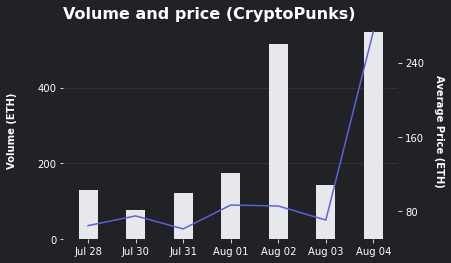

In [12]:
#create graph
plt.style.use('dark_background')

fig, ax = plt.subplots()
fig.set_facecolor('#202225')
ax.set_facecolor("#202225")
ax.grid( axis="y", zorder=0, color="#36383F")
ax.bar(x=dates, height=volumes, width=0.4, zorder=3, color="#E6E8EB")
ax.yaxis.set_major_locator(plt.MaxNLocator(3))
ax.set_ylabel("Volume (ETH)", fontweight='heavy', labelpad=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax2 = ax.twinx()
ax2.plot(dates, avgs, color='#5B60E0')
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))
ax2.set_ylabel("Average Price (ETH)", fontweight='heavy', rotation=270, labelpad=20)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.title('Volume and price (CryptoPunks)', loc='left', fontsize=16, fontweight="heavy", verticalalignment="top")
plt.show()